 3 To- Do Exercise:

 Problem- 1: Perform a classification task with knn from scratch.
 1. Load the Dataset:
 • Read the dataset into a pandas DataFrame.
 • Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
 (e.g., check data types, missing values, summary statistics).


In [14]:
import pandas as pd
import numpy as np
data_frame = pd.read_csv("/content/drive/MyDrive/AI_SEM3/Datasets/diabetes.csv")
print("First few rows of the dataset:")
(data_frame.head())


First few rows of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
print("\nDataset Info:")
(data_frame.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
print("\nSummary Statistics:")
(data_frame.describe())


Summary Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
data_frame = data_frame.select_dtypes(exclude=['object'])
data_frame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


 2. Handle Missing Data:
 • Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [18]:
def handle_missing_data(data):
    data = data.dropna()
    print("\nMissing values handled. Updated missing value count:")
    print(data.isnull().sum())
    return data

data = handle_missing_data(data_frame)



Missing values handled. Updated missing value count:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


3. Feature Engineering:
 • Separate the feature matrix (X) and target variable (y).
 • Perform a train- test split from scratch using a 70% − 30% ratio.

In [19]:
X = data_frame.drop('Outcome',axis=1)
Y = data_frame['Outcome']

#Train - test split from scratch using a 70% − 30% ratio.
X_train,Y_train = X[:538],Y[:538]
X_test,Y_test = X[230:],Y[230:]

In [20]:
X_train = np.array(X_train)
X_test = np.array(X_test)

 4. Implement KNN:
 • Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).
 • Compute distances using Euclidean distance.


In [7]:
def euclidean_distance(x1, x2):
  if len(x1) != len(x2):
    raise ValueError("Input vectors must have the same dimension")
  else:
    distance = np.sqrt(np.sum((x1 - x2) ** 2))
    return distance


In [21]:
def knn_predict_single(query , X_train , Y_train , k=3):
    distances = [euclidean_distance(query,x)for x in X_train]
    sort_dist = np.argsort(distances)
    nearest_neighbors = sort_dist[:k]
    nearest_labels = Y_train[nearest_neighbors]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction

Predict classes for all test samples

In [22]:
def knn_predict(X_test , X_train , Y_train , k=3):
    predictions  = [knn_predict_single(x,X_train,Y_train,k) for x in X_test]
    return np.array(predictions)

In [24]:
X_test

array([[  4.   , 142.   ,  86.   , ...,  44.   ,   0.645,  22.   ],
       [  6.   , 134.   ,  80.   , ...,  46.2  ,   0.238,  46.   ],
       [  1.   ,  79.   ,  80.   , ...,  25.4  ,   0.583,  22.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [25]:
predictions = knn_predict(X_test,X_train,Y_train,k=3)

Evaluate the performance using accuracy

In [26]:
def compute_accuracy(y_true , y_pred):
    correct_predictions = np.sum(y_pred == y_true)
    total_samples = len(y_true)
    accuracy = (correct_predictions / total_samples) *100
    return accuracy

Probelm2 Experimentation:


In [27]:
X_scaled = (X - X.mean()) / X.std()
X_scaled = np.array(X_scaled)

In [28]:
X_train_scaled = X_scaled[:538]
X_test_scaled = X_scaled[230:]

In [29]:
x_test_sample_scaled = X_test_scaled
predictions_scaled = knn_predict(x_test_sample_scaled , X_train_scaled , Y_train , k=3)

Compare the accuracy and performance of the kNN model on the original dataset from problem 1 versus the scaled dataset.

In [30]:
print("Total accuracy percentage is :",compute_accuracy(predictions_scaled , Y_test),"%")


Total accuracy percentage is : 83.64312267657994 %


In [31]:
print("Total accuracy percentage is :",compute_accuracy(predictions , Y_test),"%")


Total accuracy percentage is : 79.182156133829 %


 Problem- 3- Experimentation with k:
 1. Vary the number of neighbors- k:
 • Run the KNN model on both the original and scaled datasets for a range of:
 k= 1,2,3,...15
 • For each k, record:– Accuracy.– Time taken to make predictions.



In [36]:
import pandas as pd
import numpy as np
import time

knn = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
time_results = []
accuracy = []


for i in knn:
    start_unscaled = time.time()
    predictions = knn_predict(X_test,X_train,Y_train,k=i)
    compute_accuracy(predictions , Y_test)
    end_unscaled = time.time()
    unscaled_time = end_unscaled - start_unscaled


    start_scaled = time.time()
    predictions_scaled = knn_predict(x_test_sample_scaled , X_train_scaled , Y_train , k=i)
    end_scaled = time.time()
    scaled_time = end_scaled - start_scaled

    time_results.append({
        'k': i,
        'time_unscaled': unscaled_time,
        'time_scaled': scaled_time,
    })
    accuracy.append({
        'k': i,
        'accuracy_unscaled': compute_accuracy(predictions , Y_test),
        'accuracy_scaled': compute_accuracy(predictions_scaled , Y_test),
    })

time_df = pd.DataFrame(time_results)
print(time_df)

     k  time_unscaled  time_scaled
0    1       3.849574     2.986850
1    2       2.529864     2.939977
2    3       2.342436     3.769612
3    4       2.824313     3.679297
4    5       2.368807     2.383196
5    6       4.067404     2.416671
6    7       2.374358     2.356467
7    8       2.445445     3.518486
8    9       3.136863     2.373733
9   10       2.362758     2.338366
10  11       3.793630     4.490230
11  12       2.331780     2.321946
12  13       2.313469     3.136424
13  14       3.474210     2.297019
14  15       2.370263     2.348768


In [37]:
accuracy_df = pd.DataFrame(accuracy)
print(accuracy_df)

     k  accuracy_unscaled  accuracy_scaled
0    1          86.245353        88.104089
1    2          79.925651        79.739777
2    3          79.182156        83.643123
3    4          77.323420        80.297398
4    5          76.765799        79.368030
5    6          76.579926        77.881041
6    7          76.022305        78.996283
7    8          76.765799        77.509294
8    9          76.022305        78.996283
9   10          76.765799        76.951673
10  11          76.394052        76.579926
11  12          77.323420        76.951673
12  13          76.579926        77.137546
13  14          77.881041        76.579926
14  15          76.579926        77.509294


 2. Visualize the Results:
 • Plot the following graphs:– k vs. Accuracy for original and scaled datasets.– k vs. Time Taken for original and scaled datasets.

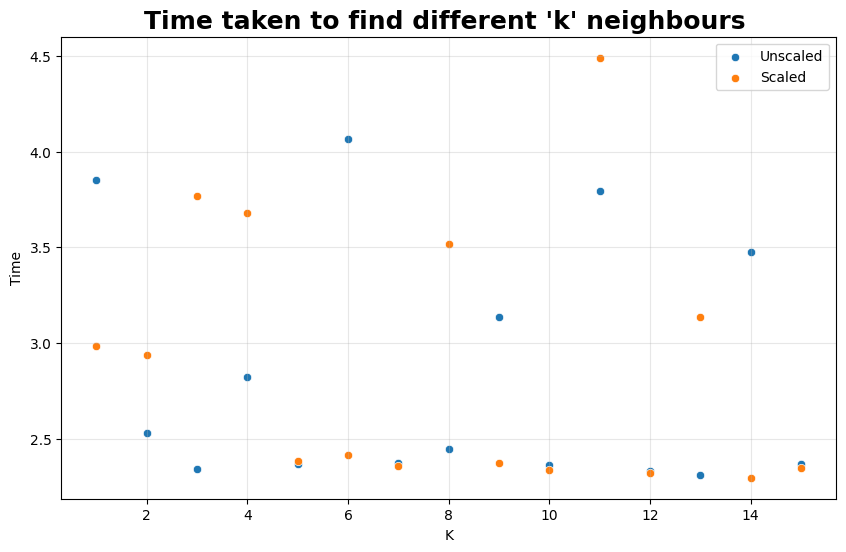

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

#k vs accuracy for original and scaled datasets
plt.figure(figsize=(10,6))
sns.scatterplot(x='k',y='time_unscaled',data=time_df,label='Unscaled')
sns.scatterplot(x='k',y='time_scaled',data=time_df,label='Scaled')
plt.title("Time taken to find different 'k' neighbours ",fontweight='bold',fontsize='18')
plt.xlabel("K")
plt.ylabel("Time")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

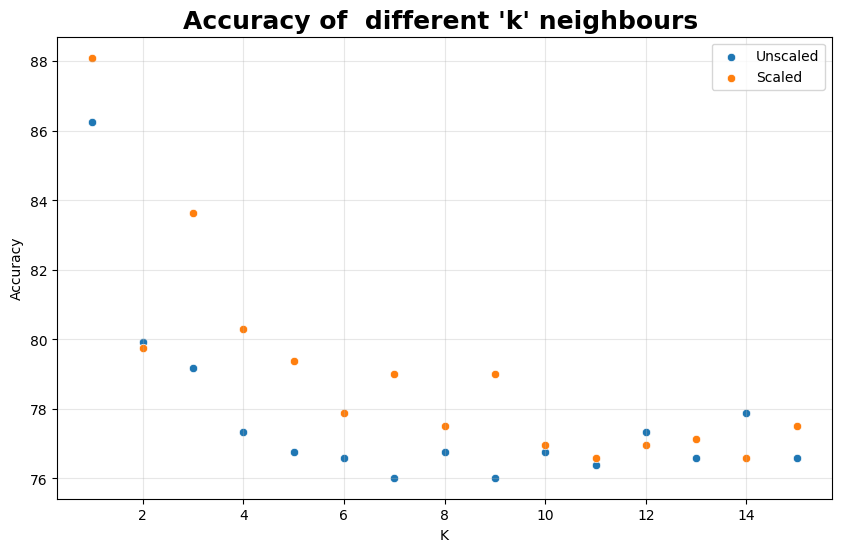

In [41]:
#k vs time taken for original ans scaled datasets
plt.figure(figsize=(10,6))
sns.scatterplot(x='k',y='accuracy_unscaled',data=accuracy_df,label='Unscaled')
sns.scatterplot(x='k',y='accuracy_scaled',data=accuracy_df,label='Scaled')
plt.title("Accuracy of  different 'k' neighbours ",fontweight='bold',fontsize='18')
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(alpha=0.3)
plt.legend()
plt.show()